# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint 
import seaborn as sns
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query = f"{url}appid={api_key}&units={units}&q="


latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]}").json()
    
    # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN
    try:
        temperature.append(response['main']['temp_max'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        dates.append(response['dt'])
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        dates.append(np.nan)
    
    # Sometimes it's not cloudy! Then 'clouds' does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")
    print(f"{query}{cities[x]}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": dates,
                          })

    



Processing record 1 | kecskemet
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=kecskemet
Processing record 2 | rorvik
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=rorvik
Processing record 3 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=puerto ayora
Processing record 4 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=sentyabrskiy
Processing record 5 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=ponta do sol
Processing record 6 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=pangnirtung
Processing record 7 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754

Processing record 59 | dudinka
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=dudinka
Processing record 60 | chicama
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=chicama
Processing record 61 | alofi
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=alofi
Processing record 62 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=rio gallegos
Processing record 63 | pedernales
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=pedernales
Processing record 64 | dornstadt
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=dornstadt
Processing record 65 | ouadda
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q

Processing record 118 | santa fe
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=santa fe
Processing record 119 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=norman wells
Processing record 120 | mumford
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=mumford
Processing record 121 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=aklavik
Processing record 122 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=kruisfontein
Processing record 123 | kang
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=kang
Processing record 124 | bagnols-sur-ceze
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6

Processing record 177 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=lavrentiya
Processing record 178 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=amderma
Processing record 179 | yeppoon
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=yeppoon
Processing record 180 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=faanui
Processing record 181 | homer
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=homer
Processing record 182 | rundu
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=rundu
Processing record 183 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=bathsheba

Processing record 236 | linqiong
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=linqiong
Processing record 237 | siemiatycze
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=siemiatycze
Processing record 238 | hofn
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=hofn
Processing record 239 | ekibastuz
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=ekibastuz
Processing record 240 | wanderlandia
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=wanderlandia
Processing record 241 | staryy nadym
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=staryy nadym
Processing record 242 | ha tinh
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea52475416

Processing record 294 | rivne
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=rivne
Processing record 295 | cooma
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=cooma
Processing record 296 | atikokan
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=atikokan
Processing record 297 | hyderabad
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=hyderabad
Processing record 298 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=deputatskiy
Processing record 299 | inirida
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=inirida
Processing record 300 | san ignacio
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial

Processing record 350 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=grand gaube
Processing record 351 | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=richards bay
Processing record 352 | salinas
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=salinas
Processing record 353 | emerald
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=emerald
Processing record 354 | rehoboth
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=rehoboth
Processing record 355 | north bend
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=north bend
Processing record 356 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&

Processing record 409 | calabozo
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=calabozo
Processing record 410 | morondava
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=morondava
Processing record 411 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=cherskiy
Processing record 412 | mahon
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=mahon
Processing record 413 | visby
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=visby
Processing record 414 | tukrah
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=tukrah
Processing record 415 | bereznik
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=bereznik

Processing record 468 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=marcona
Processing record 469 | namwala
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=namwala
Processing record 470 | hoi an
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=hoi an
Processing record 471 | sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=sept-iles
Processing record 472 | zambezi
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=zambezi
Processing record 473 | tsienyane
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=tsienyane
Processing record 474 | umm ruwabah
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial

Processing record 527 | mocuba
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=mocuba
Processing record 528 | alexandria
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=alexandria
Processing record 529 | huainan
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=huainan
Processing record 530 | utraula
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=utraula
Processing record 531 | zinder
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=zinder
Processing record 532 | steamboat springs
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=steamboat springs
Processing record 533 | seymchan
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&u

Processing record 586 | anshun
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=anshun
Processing record 587 | hamilton
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=hamilton
Processing record 588 | sarab
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=sarab
Processing record 589 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=mayo
Processing record 590 | marathokambos
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=marathokambos
Processing record 591 | jumla
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=jumla
Processing record 592 | tabiauea
http://api.openweathermap.org/data/2.5/weather?appid=1a84a0482890d3ec319ea524754167b6&units=imperial&q=tabiauea

In [27]:
weather_df

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date
0,kecskemet,46.91,19.69,93.0,51.01,90,9.17,1.573358e+09
1,rorvik,64.86,11.24,67.0,26.01,0,1.99,1.573358e+09
2,puerto ayora,-0.74,-90.35,88.0,70.00,8,4.00,1.573358e+09
3,sentyabrskiy,NaN,NaN,NaN,NaN,0,NaN,NaN
4,ponta do sol,-20.63,-46.00,93.0,67.89,100,3.69,1.573358e+09
...,...,...,...,...,...,...,...,...
611,bolobo,-2.17,16.23,85.0,73.60,100,0.11,1.573358e+09
612,kota bahru,NaN,NaN,NaN,NaN,0,NaN,NaN
613,guelengdeng,NaN,NaN,NaN,NaN,0,NaN,NaN
614,balkanabat,39.51,54.36,23.0,53.02,0,12.84,1.573358e+09


{'abu dhabi': {'base': 'stations',
               'clouds': {'all': 33},
               'cod': 200,
               'coord': {'lat': 24.47, 'lon': 54.37},
               'dt': 1573262854,
               'id': 292968,
               'main': {'humidity': 78,
                        'pressure': 1013,
                        'temp': 75.2,
                        'temp_max': 75.2,
                        'temp_min': 75.2},
               'name': 'Abu Dhabi',
               'sys': {'country': 'AE',
                       'id': 7533,
                       'sunrise': 1573266836,
                       'sunset': 1573306723,
                       'type': 1},
               'timezone': 14400,
               'visibility': 10000,
               'weather': [{'description': 'scattered clouds',
                            'icon': '03n',
                            'id': 802,
                            'main': 'Clouds'}],
               'wind': {'deg': 72, 'speed': 9.93}},
 'abu zabad': {'base': 'mod

            'cod': 200,
            'coord': {'lat': 32.73, 'lon': 108.99},
            'dt': 1573263000,
            'id': 1789065,
            'main': {'grnd_level': 943,
                     'humidity': 85,
                     'pressure': 1022,
                     'sea_level': 1022,
                     'temp': 50.76,
                     'temp_max': 50.76,
                     'temp_min': 50.76},
            'name': 'Ankang',
            'sys': {'country': 'CN',
                    'sunrise': 1573254485,
                    'sunset': 1573292856},
            'timezone': 28800,
            'weather': [{'description': 'overcast clouds',
                         'icon': '04d',
                         'id': 804,
                         'main': 'Clouds'}],
            'wind': {'deg': 101, 'speed': 0.78}},
 'antofagasta': {'base': 'stations',
                 'clouds': {'all': 90},
                 'cod': 200,
                 'coord': {'lat': -23.65, 'lon': -70.4},
                 

           'name': 'Babra',
           'sys': {'country': 'IN',
                   'sunrise': 1573262550,
                   'sunset': 1573302883},
           'timezone': 19800,
           'weather': [{'description': 'clear sky',
                        'icon': '01d',
                        'id': 800,
                        'main': 'Clear'}],
           'wind': {'deg': 11, 'speed': 13.65}},
 'bac lieu': {'cod': '404', 'message': 'city not found'},
 'baiyin': {'base': 'stations',
            'clouds': {'all': 90},
            'cod': 200,
            'coord': {'lat': 36.55, 'lon': 104.13},
            'dt': 1573263033,
            'id': 1817240,
            'main': {'humidity': 52,
                     'pressure': 1026,
                     'temp': 41,
                     'temp_max': 41,
                     'temp_min': 41},
            'name': 'Baiyin',
            'sys': {'country': 'CN',
                    'id': 9639,
                    'sunrise': 1573256054,
                    

                     'temp': 51.42,
                     'temp_max': 51.42,
                     'temp_min': 51.42},
            'name': 'Barrow',
            'sys': {'country': 'AR',
                    'sunrise': 1573202752,
                    'sunset': 1573253009},
            'timezone': -10800,
            'weather': [{'description': 'overcast clouds',
                         'icon': '04n',
                         'id': 804,
                         'main': 'Clouds'}],
            'wind': {'deg': 304, 'speed': 5.7}},
 'barstow': {'base': 'stations',
             'clouds': {'all': 1},
             'cod': 200,
             'coord': {'lat': 31.46, 'lon': -103.39},
             'dt': 1573263023,
             'id': 5528182,
             'main': {'humidity': 87,
                      'pressure': 1026,
                      'temp': 48.49,
                      'temp_max': 48.99,
                      'temp_min': 48.2},
             'name': 'Barstow',
             'sys': {'country': 'U

 'bluff': {'base': 'model',
           'clouds': {'all': 0},
           'cod': 200,
           'coord': {'lat': -23.58, 'lon': 149.07},
           'dt': 1573263491,
           'id': 2175403,
           'main': {'grnd_level': 991,
                    'humidity': 16,
                    'pressure': 1011,
                    'sea_level': 1011,
                    'temp': 87.78,
                    'temp_max': 87.78,
                    'temp_min': 87.78},
           'name': 'Bluff',
           'sys': {'country': 'AU',
                   'sunrise': 1573240421,
                   'sunset': 1573287680},
           'timezone': 36000,
           'weather': [{'description': 'clear sky',
                        'icon': '01d',
                        'id': 800,
                        'main': 'Clear'}],
           'wind': {'deg': 197, 'speed': 18.14}},
 'boa vista': {'base': 'stations',
               'clouds': {'all': 75},
               'cod': 200,
               'coord': {'lat': 2.82, 'lon': -

                     'sunset': 1573322882,
                     'type': 1},
             'timezone': 0,
             'visibility': 10000,
             'weather': [{'description': 'broken clouds',
                          'icon': '04n',
                          'id': 803,
                          'main': 'Clouds'}],
             'wind': {'deg': 60, 'speed': 16.11}},
 'camalu': {'base': 'model',
            'clouds': {'all': 0},
            'cod': 200,
            'coord': {'lat': 30.85, 'lon': -116.07},
            'dt': 1573263012,
            'id': 3979216,
            'main': {'grnd_level': 983,
                     'humidity': 50,
                     'pressure': 1016,
                     'sea_level': 1016,
                     'temp': 64.87,
                     'temp_max': 64.87,
                     'temp_min': 64.87},
            'name': 'Camalu',
            'sys': {'country': 'MX',
                    'sunrise': 1573221895,
                    'sunset': 1573260670},
      

             'name': 'Cayenne',
             'sys': {'country': 'GF',
                     'id': 8669,
                     'sunrise': 1573204528,
                     'sunset': 1573247440,
                     'type': 1},
             'timezone': -10800,
             'visibility': 10000,
             'weather': [{'description': 'scattered clouds',
                          'icon': '03n',
                          'id': 802,
                          'main': 'Clouds'}],
             'wind': {'deg': 79, 'speed': 5.97}},
 'charlestown': {'base': 'stations',
                 'clouds': {'all': 1},
                 'cod': 200,
                 'coord': {'lat': 41.38, 'lon': -71.64},
                 'dt': 1573263005,
                 'id': 5221384,
                 'main': {'humidity': 53,
                          'pressure': 1024,
                          'temp': 28.98,
                          'temp_max': 32,
                          'temp_min': 26.01},
                 'name': 'Charl

              'main': {'grnd_level': 981,
                       'humidity': 43,
                       'pressure': 1010,
                       'sea_level': 1010,
                       'temp': 15.49,
                       'temp_max': 15.49,
                       'temp_min': 15.49},
              'name': 'Chumikan',
              'sys': {'country': 'RU',
                      'sunrise': 1573251366,
                      'sunset': 1573283340},
              'timezone': 36000,
              'weather': [{'description': 'clear sky',
                           'icon': '01d',
                           'id': 800,
                           'main': 'Clear'}],
              'wind': {'deg': 276, 'speed': 22.88}},
 'chuy': {'base': 'model',
          'clouds': {'all': 1},
          'cod': 200,
          'coord': {'lat': -33.69, 'lon': -53.46},
          'dt': 1573262992,
          'id': 3443061,
          'main': {'grnd_level': 1016,
                   'humidity': 87,
                   'pres

              'id': 3893629,
              'main': {'humidity': 87,
                       'pressure': 1013,
                       'temp': 55.4,
                       'temp_max': 55.4,
                       'temp_min': 55.4},
              'name': 'Coquimbo',
              'sys': {'country': 'CL',
                      'id': 8514,
                      'sunrise': 1573206338,
                      'sunset': 1573254756,
                      'type': 1},
              'timezone': -10800,
              'visibility': 10000,
              'weather': [{'description': 'scattered clouds',
                           'icon': '03n',
                           'id': 802,
                           'main': 'Clouds'}],
              'wind': {'deg': 280, 'speed': 4.7}},
 'corinto': {'base': 'stations',
             'clouds': {'all': 75},
             'cod': 200,
             'coord': {'lat': 3.17, 'lon': -76.26},
             'dt': 1573263011,
             'id': 3685871,
             'main': {'humi

                           'main': 'Clouds'}],
              'wind': {'deg': 134, 'speed': 5.3}},
 'dzhusaly': {'cod': '404', 'message': 'city not found'},
 'east london': {'base': 'model',
                 'clouds': {'all': 63},
                 'cod': 200,
                 'coord': {'lat': -33.02, 'lon': 27.91},
                 'dt': 1573263016,
                 'id': 1006984,
                 'main': {'grnd_level': 1019,
                          'humidity': 68,
                          'pressure': 1023,
                          'sea_level': 1023,
                          'temp': 62.01,
                          'temp_max': 62.01,
                          'temp_min': 62.01},
                 'name': 'East London',
                 'sys': {'country': 'ZA',
                         'sunrise': 1573268570,
                         'sunset': 1573317692},
                 'timezone': 7200,
                 'weather': [{'description': 'broken clouds',
                              'ic

            'wind': {'deg': 99, 'speed': 8.14}},
 'general roca': {'base': 'stations',
                  'clouds': {'all': 18},
                  'cod': 200,
                  'coord': {'lat': -39.03, 'lon': -67.58},
                  'dt': 1573263049,
                  'id': 3855065,
                  'main': {'humidity': 22,
                           'pressure': 1015,
                           'temp': 68,
                           'temp_max': 68,
                           'temp_min': 68},
                  'name': 'General Roca',
                  'sys': {'country': 'AR',
                          'id': 8310,
                          'sunrise': 1573204425,
                          'sunset': 1573254864,
                          'type': 1},
                  'timezone': -10800,
                  'visibility': 10000,
                  'weather': [{'description': 'few clouds',
                               'icon': '02n',
                               'id': 801,
                 

                 'weather': [{'description': 'clear sky',
                              'icon': '01n',
                              'id': 800,
                              'main': 'Clear'}],
                 'wind': {'deg': 112, 'speed': 6.13}},
 'goundi': {'base': 'model',
            'clouds': {'all': 32},
            'cod': 200,
            'coord': {'lat': 9.36, 'lon': 17.37},
            'dt': 1573263018,
            'id': 2431736,
            'main': {'grnd_level': 967,
                     'humidity': 49,
                     'pressure': 1009,
                     'sea_level': 1009,
                     'temp': 73.74,
                     'temp_max': 73.74,
                     'temp_min': 73.74},
            'name': 'Goundi',
            'sys': {'country': 'TD',
                    'sunrise': 1573274532,
                    'sunset': 1573316789},
            'timezone': 3600,
            'weather': [{'description': 'scattered clouds',
                         'icon': '03n',
 

                    'sunset': 1573324694,
                    'type': 1},
            'timezone': 0,
            'visibility': 10000,
            'weather': [{'description': 'overcast clouds',
                         'icon': '04n',
                         'id': 804,
                         'main': 'Clouds'}],
            'wind': {'deg': 360, 'speed': 6.93}},
 'gunzburg': {'base': 'stations',
              'clouds': {'all': 100},
              'cod': 200,
              'coord': {'lat': 48.45, 'lon': 10.27},
              'dt': 1573263001,
              'id': 2913555,
              'main': {'humidity': 86,
                       'pressure': 1007,
                       'temp': 36.66,
                       'temp_max': 39,
                       'temp_min': 35.01},
              'name': 'Gunzburg',
              'sys': {'country': 'DE',
                      'id': 1308,
                      'sunrise': 1573280202,
                      'sunset': 1573314528,
                      'type'

                    'sys': {'country': 'US',
                            'id': 9745,
                            'sunrise': 1573213218,
                            'sunset': 1573250156,
                            'type': 1},
                    'timezone': -18000,
                    'visibility': 16093,
                    'weather': [{'description': 'clear sky',
                                 'icon': '01n',
                                 'id': 800,
                                 'main': 'Clear'}],
                    'wind': {'deg': 354, 'speed': 6.33}},
 'hay river': {'base': 'stations',
               'clouds': {'all': 75},
               'cod': 200,
               'coord': {'lat': 60.82, 'lon': -115.79},
               'dt': 1573263008,
               'id': 5972762,
               'main': {'humidity': 61,
                        'pressure': 1026,
                        'temp': 15.8,
                        'temp_max': 15.8,
                        'temp_min': 15.8},
      

 'hounde': {'base': 'model',
            'clouds': {'all': 0},
            'cod': 200,
            'coord': {'lat': 11.5, 'lon': -3.52},
            'dt': 1573263030,
            'id': 2360073,
            'main': {'grnd_level': 971,
                     'humidity': 39,
                     'pressure': 1008,
                     'sea_level': 1008,
                     'temp': 79.66,
                     'temp_max': 79.66,
                     'temp_min': 79.66},
            'name': 'Hounde',
            'sys': {'country': 'BF',
                    'sunrise': 1573279706,
                    'sunset': 1573321643},
            'timezone': 0,
            'weather': [{'description': 'clear sky',
                         'icon': '01n',
                         'id': 800,
                         'main': 'Clear'}],
            'wind': {'deg': 205, 'speed': 4.21}},
 'hualmay': {'base': 'model',
             'clouds': {'all': 17},
             'cod': 200,
             'coord': {'lat': -11.1, 'l

             'coord': {'lat': -19.55, 'lon': 169.27},
             'dt': 1573263005,
             'id': 2136825,
             'main': {'humidity': 65,
                      'pressure': 1008,
                      'temp': 82.4,
                      'temp_max': 82.4,
                      'temp_min': 82.4},
             'name': 'Isangel',
             'sys': {'country': 'VU',
                     'id': 7317,
                     'sunrise': 1573235918,
                     'sunset': 1573282486,
                     'type': 1},
             'timezone': 39600,
             'visibility': 10000,
             'weather': [{'description': 'few clouds',
                          'icon': '02d',
                          'id': 801,
                          'main': 'Clouds'}],
             'wind': {'deg': 180, 'speed': 9.17}},
 'isla aguada': {'base': 'stations',
                 'clouds': {'all': 90},
                 'cod': 200,
                 'coord': {'lat': 18.78, 'lon': -91.49},
          

                     'pressure': 1026,
                     'temp': 38.23,
                     'temp_max': 41,
                     'temp_min': 34},
            'name': 'Jasper',
            'sys': {'country': 'US',
                    'id': 2738,
                    'sunrise': 1573215276,
                    'sunset': 1573253470,
                    'type': 1},
            'timezone': -21600,
            'visibility': 16093,
            'weather': [{'description': 'clear sky',
                         'icon': '01n',
                         'id': 800,
                         'main': 'Clear'}],
            'wind': {'deg': 30, 'speed': 4.7}},
 'jhelum': {'base': 'model',
            'clouds': {'all': 0},
            'cod': 200,
            'coord': {'lat': 32.94, 'lon': 73.72},
            'dt': 1573262971,
            'id': 1175864,
            'main': {'grnd_level': 977,
                     'humidity': 50,
                     'pressure': 1015,
                     'sea_level': 101

 'kalanguy': {'base': 'model',
              'clouds': {'all': 43},
              'cod': 200,
              'coord': {'lat': 51.01, 'lon': 116.52},
              'dt': 1573262993,
              'id': 2023298,
              'main': {'grnd_level': 910,
                       'humidity': 77,
                       'pressure': 1015,
                       'sea_level': 1015,
                       'temp': 24.94,
                       'temp_max': 24.94,
                       'temp_min': 24.94},
              'name': 'Kalanguy',
              'sys': {'country': 'RU',
                      'sunrise': 1573255123,
                      'sunset': 1573288603},
              'timezone': 32400,
              'weather': [{'description': 'scattered clouds',
                           'icon': '03d',
                           'id': 802,
                           'main': 'Clouds'}],
              'wind': {'deg': 117, 'speed': 3.22}},
 'kalmunai': {'base': 'model',
              'clouds': {'all': 98},

              'weather': [{'description': 'light intensity drizzle',
                           'icon': '09n',
                           'id': 300,
                           'main': 'Drizzle'}],
              'wind': {'deg': 60, 'speed': 10.29}},
 'karratha': {'base': 'model',
              'clouds': {'all': 98},
              'cod': 200,
              'coord': {'lat': -20.74, 'lon': 116.85},
              'dt': 1573263048,
              'id': 6620339,
              'main': {'grnd_level': 1012,
                       'humidity': 51,
                       'pressure': 1012,
                       'sea_level': 1012,
                       'temp': 83.41,
                       'temp_max': 83.41,
                       'temp_min': 83.41},
              'name': 'Karratha',
              'sys': {'country': 'AU',
                      'sunrise': 1573248396,
                      'sunset': 1573295171},
              'timezone': 28800,
              'weather': [{'description': 'overcast cloud

                    'temp': 41,
                    'temp_max': 41,
                    'temp_min': 41},
           'name': 'Kholm',
           'sys': {'country': 'AF',
                   'id': 7384,
                   'sunrise': 1573264819,
                   'sunset': 1573302342,
                   'type': 1},
           'timezone': 16200,
           'visibility': 10000,
           'weather': [{'description': 'clear sky',
                        'icon': '01n',
                        'id': 800,
                        'main': 'Clear'}],
           'wind': {'deg': 300, 'speed': 2.24}},
 'khrebtovaya': {'base': 'model',
                 'clouds': {'all': 99},
                 'cod': 200,
                 'coord': {'lat': 56.71, 'lon': 104.25},
                 'dt': 1573263019,
                 'id': 2022232,
                 'main': {'grnd_level': 937,
                          'humidity': 89,
                          'pressure': 1006,
                          'sea_level': 1006,
   

                  'weather': [{'description': 'scattered clouds',
                               'icon': '03n',
                               'id': 802,
                               'main': 'Clouds'}],
                  'wind': {'deg': 51, 'speed': 5.66}},
 'ksenyevka': {'cod': '404', 'message': 'city not found'},
 'kununurra': {'base': 'stations',
               'clouds': {'all': 22},
               'cod': 200,
               'coord': {'lat': -15.77, 'lon': 128.74},
               'dt': 1573262997,
               'id': 2068110,
               'main': {'humidity': 39,
                        'pressure': 1011,
                        'temp': 95,
                        'temp_max': 95,
                        'temp_min': 95},
               'name': 'Kununurra',
               'sys': {'country': 'AU',
                       'id': 9587,
                       'sunrise': 1573245949,
                       'sunset': 1573291911,
                       'type': 1},
               'timezone':

                        'type': 1},
                'timezone': 39600,
                'visibility': 10000,
                'weather': [{'description': 'overcast clouds',
                             'icon': '04d',
                             'id': 804,
                             'main': 'Clouds'}],
                'wind': {'deg': 340, 'speed': 19.46}},
 'lavrentiya': {'base': 'model',
                'clouds': {'all': 100},
                'cod': 200,
                'coord': {'lat': 65.58, 'lon': -170.99},
                'dt': 1573263017,
                'id': 4031637,
                'main': {'grnd_level': 1006,
                         'humidity': 97,
                         'pressure': 1009,
                         'sea_level': 1009,
                         'temp': 30.9,
                         'temp_max': 30.9,
                         'temp_min': 30.9},
                'name': 'Lavrentiya',
                'snow': {'3h': 1.19},
                'sys': {'country': 'RU',
  

               'id': 934322,
               'main': {'humidity': 88,
                        'pressure': 1018,
                        'temp': 67.86,
                        'temp_max': 69.01,
                        'temp_min': 66.2},
               'name': 'Mahebourg',
               'sys': {'country': 'MU',
                       'id': 2061,
                       'sunrise': 1573262616,
                       'sunset': 1573309345,
                       'type': 1},
               'timezone': 14400,
               'visibility': 10000,
               'weather': [{'description': 'few clouds',
                            'icon': '02d',
                            'id': 801,
                            'main': 'Clouds'}],
               'wind': {'deg': 320, 'speed': 4.7}},
 'mahon': {'base': 'stations',
           'clouds': {'all': 75},
           'cod': 200,
           'coord': {'lat': 51.89, 'lon': -8.4},
           'dt': 1573263024,
           'id': 2965139,
           'main': {'humid

 'maniitsoq': {'base': 'model',
               'clouds': {'all': 94},
               'cod': 200,
               'coord': {'lat': 65.42, 'lon': -52.9},
               'dt': 1573263041,
               'id': 3421982,
               'main': {'grnd_level': 985,
                        'humidity': 49,
                        'pressure': 993,
                        'sea_level': 993,
                        'temp': 37.04,
                        'temp_max': 37.04,
                        'temp_min': 37.04},
               'name': 'Maniitsoq',
               'sys': {'country': 'GL',
                       'sunrise': 1573213584,
                       'sunset': 1573238658},
               'timezone': -10800,
               'weather': [{'description': 'overcast clouds',
                            'icon': '04n',
                            'id': 804,
                            'main': 'Clouds'}],
               'wind': {'deg': 65, 'speed': 17.29}},
 'mantua': {'base': 'stations',
            'c

           'timezone': 7200,
           'weather': [{'description': 'clear sky',
                        'icon': '01n',
                        'id': 800,
                        'main': 'Clear'}],
           'wind': {'deg': 5, 'speed': 7.09}},
 'matiguas': {'base': 'model',
              'clouds': {'all': 55},
              'cod': 200,
              'coord': {'lat': 12.84, 'lon': -85.46},
              'dt': 1573263038,
              'id': 3617694,
              'main': {'grnd_level': 958,
                       'humidity': 98,
                       'pressure': 1013,
                       'sea_level': 1013,
                       'temp': 69.17,
                       'temp_max': 69.17,
                       'temp_min': 69.17},
              'name': 'Matiguas',
              'sys': {'country': 'NI',
                      'sunrise': 1573213055,
                      'sunset': 1573254817},
              'timezone': -21600,
              'weather': [{'description': 'broken clouds',
   

                     'temp_min': 50.23},
            'name': 'Mongar',
            'sys': {'country': 'BT',
                    'sunrise': 1573258230,
                    'sunset': 1573297631},
            'timezone': 21600,
            'weather': [{'description': 'overcast clouds',
                         'icon': '04d',
                         'id': 804,
                         'main': 'Clouds'}],
            'wind': {'deg': 82, 'speed': 2.21}},
 'moose factory': {'base': 'stations',
                   'clouds': {'all': 75},
                   'cod': 200,
                   'coord': {'lat': 51.26, 'lon': -80.61},
                   'dt': 1573263004,
                   'id': 6078372,
                   'main': {'humidity': 72,
                            'pressure': 1021,
                            'temp': 14,
                            'temp_max': 14,
                            'temp_min': 14},
                   'name': 'Moose Factory',
                   'sys': {'country': 'CA

                     'pressure': 1013,
                     'sea_level': 1013,
                     'temp': 74.08,
                     'temp_max': 74.08,
                     'temp_min': 74.08},
            'name': 'Muheza',
            'rain': {'3h': 1.44},
            'sys': {'country': 'TZ',
                    'sunrise': 1573268335,
                    'sunset': 1573312703},
            'timezone': 10800,
            'weather': [{'description': 'light rain',
                         'icon': '10n',
                         'id': 500,
                         'main': 'Rain'}],
            'wind': {'deg': 226, 'speed': 4.92}},
 'muros': {'base': 'stations',
           'clouds': {'all': 75},
           'cod': 200,
           'coord': {'lat': 42.77, 'lon': -9.06},
           'dt': 1573263005,
           'id': 3115824,
           'main': {'humidity': 81,
                    'pressure': 1022,
                    'temp': 47.95,
                    'temp_max': 52,
                    'temp

           'weather': [{'description': 'broken clouds',
                        'icon': '04n',
                        'id': 803,
                        'main': 'Clouds'}],
           'wind': {'deg': 309, 'speed': 1.52}},
 'nizhneyansk': {'cod': '404', 'message': 'city not found'},
 'nome': {'base': 'stations',
          'clouds': {'all': 1},
          'cod': 200,
          'coord': {'lat': 30.04, 'lon': -94.42},
          'dt': 1573263020,
          'id': 4732862,
          'main': {'humidity': 76,
                   'pressure': 1025,
                   'temp': 50.45,
                   'temp_max': 53.6,
                   'temp_min': 46.99},
          'name': 'Nome',
          'sys': {'country': 'US',
                  'id': 3476,
                  'sunrise': 1573216619,
                  'sunset': 1573255553,
                  'type': 1},
          'timezone': -21600,
          'visibility': 16093,
          'weather': [{'description': 'clear sky',
                       'icon': '0

             'main': {'humidity': 77,
                      'pressure': 1015,
                      'temp': 69.01,
                      'temp_max': 69.01,
                      'temp_min': 69.01},
             'name': 'Opotiki',
             'sys': {'country': 'NZ',
                     'id': 2000325,
                     'sunrise': 1573232165,
                     'sunset': 1573282390,
                     'type': 3},
             'timezone': 46800,
             'weather': [{'description': 'clear sky',
                          'icon': '01d',
                          'id': 800,
                          'main': 'Clear'}],
             'wind': {'deg': 60, 'gust': 17, 'speed': 5.01}},
 'oranjestad': {'base': 'stations',
                'clouds': {'all': 20},
                'cod': 200,
                'coord': {'lat': 12.52, 'lon': -70.03},
                'dt': 1573262720,
                'id': 3577154,
                'main': {'humidity': 70,
                         'pressure': 100

                          'sea_level': 1005,
                          'temp': 17.29,
                          'temp_max': 17.29,
                          'temp_min': 17.29},
                 'name': 'Pangnirtung',
                 'sys': {'country': 'CA',
                         'sunrise': 1573217045,
                         'sunset': 1573241351},
                 'timezone': -18000,
                 'weather': [{'description': 'overcast clouds',
                              'icon': '04n',
                              'id': 804,
                              'main': 'Clouds'}],
                 'wind': {'deg': 40, 'speed': 11.74}},
 'pasni': {'base': 'model',
           'clouds': {'all': 0},
           'cod': 200,
           'coord': {'lat': 25.26, 'lon': 63.48},
           'dt': 1573263032,
           'id': 1168312,
           'main': {'grnd_level': 1008,
                    'humidity': 13,
                    'pressure': 1019,
                    'sea_level': 1019,
           

             'timezone': -18000,
             'weather': [{'description': 'moderate rain',
                          'icon': '10n',
                          'id': 501,
                          'main': 'Rain'}],
             'wind': {'deg': 261, 'speed': 18.07}},
 'placido de castro': {'base': 'model',
                       'clouds': {'all': 86},
                       'cod': 200,
                       'coord': {'lat': -10.34, 'lon': -67.19},
                       'dt': 1573263012,
                       'id': 3924895,
                       'main': {'grnd_level': 987,
                                'humidity': 79,
                                'pressure': 1008,
                                'sea_level': 1008,
                                'temp': 76.24,
                                'temp_max': 76.24,
                                'temp_min': 76.24},
                       'name': 'Placido de Castro',
                       'sys': {'country': 'BR',
                     

                    'cod': 200,
                    'coord': {'lat': -31.43, 'lon': 152.91},
                    'dt': 1573263025,
                    'id': 2152659,
                    'main': {'humidity': 16,
                             'pressure': 1010,
                             'temp': 72.37,
                             'temp_max': 77,
                             'temp_min': 69.8},
                    'name': 'Port Macquarie',
                    'sys': {'country': 'AU',
                            'id': 9610,
                            'sunrise': 1573238753,
                            'sunset': 1573287505,
                            'type': 1},
                    'timezone': 39600,
                    'visibility': 10000,
                    'weather': [{'description': 'scattered clouds',
                                 'icon': '03d',
                                 'id': 802,
                                 'main': 'Clouds'}],
                    'wind': {'deg': 240,

 'priamurskiy': {'base': 'stations',
                 'clouds': {'all': 0},
                 'cod': 200,
                 'coord': {'lat': 48.52, 'lon': 134.9},
                 'dt': 1573262999,
                 'id': 2017648,
                 'main': {'humidity': 48,
                          'pressure': 1016,
                          'temp': 19.4,
                          'temp_max': 19.4,
                          'temp_min': 19.4},
                 'name': 'Priamurskiy',
                 'sys': {'country': 'RU',
                         'id': 8867,
                         'sunrise': 1573250269,
                         'sunset': 1573284634,
                         'type': 1},
                 'timezone': 36000,
                 'visibility': 10000,
                 'weather': [{'description': 'clear sky',
                              'icon': '01d',
                              'id': 800,
                              'main': 'Clear'}],
                 'wind': {'deg': 260, '

 'rocha': {'base': 'model',
           'clouds': {'all': 18},
           'cod': 200,
           'coord': {'lat': -34.48, 'lon': -54.34},
           'dt': 1573262997,
           'id': 3440777,
           'main': {'grnd_level': 1004,
                    'humidity': 96,
                    'pressure': 1016,
                    'sea_level': 1016,
                    'temp': 55.15,
                    'temp_max': 55.15,
                    'temp_min': 55.15},
           'name': 'Rocha',
           'sys': {'country': 'UY',
                   'sunrise': 1573201786,
                   'sunset': 1573251147},
           'timezone': -10800,
           'weather': [{'description': 'few clouds',
                        'icon': '02n',
                        'id': 801,
                        'main': 'Clouds'}],
           'wind': {'deg': 76, 'speed': 6.96}},
 'roebourne': {'base': 'model',
               'clouds': {'all': 100},
               'cod': 200,
               'coord': {'lat': -20.77, 'lon'

                  'main': {'humidity': 100,
                           'pressure': 1010,
                           'temp': 34.21,
                           'temp_max': 37.4,
                           'temp_min': 30.99},
                  'name': 'Saint-Pierre',
                  'sys': {'country': 'FR',
                          'id': 6535,
                          'sunrise': 1573281735,
                          'sunset': 1573315889,
                          'type': 1},
                  'timezone': 3600,
                  'visibility': 10000,
                  'weather': [{'description': 'few clouds',
                               'icon': '02n',
                               'id': 801,
                               'main': 'Clouds'}],
                  'wind': {'deg': 240, 'speed': 6.93}},
 'sakaiminato': {'base': 'stations',
                 'clouds': {'all': 40},
                 'cod': 200,
                 'coord': {'lat': 35.55, 'lon': 133.23},
                 'dt': 157

                         'type': 1},
                 'timezone': -10800,
                 'visibility': 10000,
                 'weather': [{'description': 'few clouds',
                              'icon': '02n',
                              'id': 801,
                              'main': 'Clouds'}],
                 'wind': {'speed': 2.24}},
 'santiago del estero': {'base': 'model',
                         'clouds': {'all': 100},
                         'cod': 200,
                         'coord': {'lat': -27.8, 'lon': -64.26},
                         'dt': 1573263051,
                         'id': 3835869,
                         'main': {'grnd_level': 972,
                                  'humidity': 34,
                                  'pressure': 1006,
                                  'sea_level': 1006,
                                  'temp': 81,
                                  'temp_max': 81,
                                  'temp_min': 81},
                   

            'wind': {'deg': 320, 'speed': 10.29}},
 'shuangcheng': {'base': 'stations',
                 'clouds': {'all': 64},
                 'cod': 200,
                 'coord': {'lat': 45.37, 'lon': 126.3},
                 'dt': 1573263014,
                 'id': 2034834,
                 'main': {'humidity': 27,
                          'pressure': 1023,
                          'temp': 34.88,
                          'temp_max': 37,
                          'temp_min': 32},
                 'name': 'Shuangcheng',
                 'sys': {'country': 'CN',
                         'id': 9678,
                         'sunrise': 1573251845,
                         'sunset': 1573287187,
                         'type': 1},
                 'timezone': 28800,
                 'visibility': 10000,
                 'weather': [{'description': 'broken clouds',
                              'icon': '04d',
                              'id': 803,
                              'main

             'sys': {'country': 'CN',
                     'id': 2015990,
                     'sunrise': 1573252743,
                     'sunset': 1573290224,
                     'type': 3},
             'timezone': 28800,
             'weather': [{'description': 'clear sky',
                          'icon': '01d',
                          'id': 800,
                          'main': 'Clear'}],
             'wind': {'deg': 222, 'speed': 5.7}},
 'sussex': {'base': 'stations',
            'clouds': {'all': 90},
            'cod': 200,
            'coord': {'lat': 45.72, 'lon': -65.51},
            'dt': 1573263039,
            'id': 6159980,
            'main': {'humidity': 85,
                     'pressure': 1011,
                     'temp': 26.01,
                     'temp_max': 27,
                     'temp_min': 24.8},
            'name': 'Sussex',
            'sys': {'country': 'CA',
                    'id': 930,
                    'sunrise': 1573211491,
                 

                   'sunset': 1573294913},
           'timezone': 25200,
           'weather': [{'description': 'overcast clouds',
                        'icon': '04d',
                        'id': 804,
                        'main': 'Clouds'}],
           'wind': {'deg': 254, 'speed': 6.55}},
 'terrace': {'base': 'stations',
             'clouds': {'all': 90},
             'cod': 200,
             'coord': {'lat': 54.52, 'lon': -128.61},
             'dt': 1573263010,
             'id': 6162949,
             'main': {'humidity': 93,
                      'pressure': 1012,
                      'temp': 46.4,
                      'temp_max': 46.4,
                      'temp_min': 46.4},
             'name': 'Terrace',
             'sys': {'country': 'CA',
                     'id': 984,
                     'sunrise': 1573228230,
                     'sunset': 1573260355,
                     'type': 1},
             'timezone': -28800,
             'visibility': 24140,
            

            'sys': {'country': 'AR',
                    'sunrise': 1573203309,
                    'sunset': 1573254890},
            'timezone': -10800,
            'weather': [{'description': 'broken clouds',
                         'icon': '04n',
                         'id': 803,
                         'main': 'Clouds'}],
            'wind': {'deg': 72, 'speed': 14.16}},
 'tsihombe': {'cod': '404', 'message': 'city not found'},
 'tual': {'base': 'model',
          'clouds': {'all': 98},
          'cod': 200,
          'coord': {'lat': -5.67, 'lon': 132.75},
          'dt': 1573262999,
          'id': 1623197,
          'main': {'grnd_level': 1007,
                   'humidity': 75,
                   'pressure': 1011,
                   'sea_level': 1011,
                   'temp': 82.83,
                   'temp_max': 82.83,
                   'temp_min': 82.83},
          'name': 'Tual',
          'sys': {'country': 'ID', 'sunrise': 1573245750, 'sunset': 1573290185},
       

               'coord': {'lat': 72.79, 'lon': -56.15},
               'dt': 1573262984,
               'id': 3418910,
               'main': {'grnd_level': 1004,
                        'humidity': 68,
                        'pressure': 1005,
                        'sea_level': 1005,
                        'temp': 5.45,
                        'temp_max': 5.45,
                        'temp_min': 5.45},
               'name': 'Upernavik',
               'sys': {'country': 'GL',
                       'sunrise': 1573220926,
                       'sunset': 1573232876},
               'timezone': -10800,
               'weather': [{'description': 'clear sky',
                            'icon': '01n',
                            'id': 800,
                            'main': 'Clear'}],
               'wind': {'deg': 5, 'speed': 9.78}},
 'urucara': {'base': 'model',
             'clouds': {'all': 99},
             'cod': 200,
             'coord': {'lat': -2.54, 'lon': -57.76},
       

                      'humidity': 82,
                      'pressure': 1009,
                      'sea_level': 1009,
                      'temp': 70.72,
                      'temp_max': 70.72,
                      'temp_min': 70.72},
             'name': 'Vilhena',
             'sys': {'country': 'BR',
                     'sunrise': 1573205124,
                     'sunset': 1573250598},
             'timezone': -14400,
             'weather': [{'description': 'few clouds',
                          'icon': '02n',
                          'id': 801,
                          'main': 'Clouds'}],
             'wind': {'deg': 72, 'speed': 1.92}},
 'viseu': {'base': 'stations',
           'clouds': {'all': 89},
           'cod': 200,
           'coord': {'lat': 40.66, 'lon': -7.91},
           'dt': 1573263049,
           'id': 2732265,
           'main': {'humidity': 90,
                    'pressure': 964,
                    'temp': 45.21,
                    'temp_max': 54,
    

                    'sunrise': 1573252127,
                    'sunset': 1573290878},
            'timezone': 28800,
            'weather': [{'description': 'clear sky',
                         'icon': '01d',
                         'id': 800,
                         'main': 'Clear'}],
            'wind': {'deg': 100, 'speed': 5.97}},
 'yayva': {'base': 'stations',
           'clouds': {'all': 28},
           'cod': 200,
           'coord': {'lat': 59.33, 'lon': 57.26},
           'dt': 1573263023,
           'id': 468560,
           'main': {'humidity': 82,
                    'pressure': 1028,
                    'temp': 10.99,
                    'temp_max': 10.99,
                    'temp_min': 10.99},
           'name': 'Yayva',
           'sys': {'country': 'RU',
                   'id': 2001721,
                   'sunrise': 1573271326,
                   'sunset': 1573300847,
                   'type': 3},
           'timezone': 18000,
           'weather': [{'description':

                'wind': {'deg': 230, 'speed': 8.95}},
 'zhigansk': {'base': 'model',
              'clouds': {'all': 96},
              'cod': 200,
              'coord': {'lat': 66.77, 'lon': 123.37},
              'dt': 1573263014,
              'id': 2012530,
              'main': {'grnd_level': 1006,
                       'humidity': 88,
                       'pressure': 1011,
                       'sea_level': 1011,
                       'temp': -8.83,
                       'temp_max': -8.83,
                       'temp_min': -8.83},
              'name': 'Zhigansk',
              'sys': {'country': 'RU',
                      'sunrise': 1573258522,
                      'sunset': 1573281916},
              'timezone': 32400,
              'weather': [{'description': 'overcast clouds',
                           'icon': '04d',
                           'id': 804,
                           'main': 'Clouds'}],
              'wind': {'deg': 157, 'speed': 17.78}},
 'zuwarah': 

In [ ]:
"""things i need to find:
lat,long,max temp, humidity,temp min, clouds, wind, country,Date(convert into our time) epoc 
https://stackoverflow.com/questions/3694487/in-python-how-do-you-convert-seconds-since-epoch-to-a-datetime-object
"""


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 546 unique cities.


In [29]:
weather_df.head()


,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date
0,kecskemet,46.91,19.69,93.0,51.01,90,9.17,1.573358e+09
1,rorvik,64.86,11.24,67.0,26.01,0,1.99,1.573358e+09
2,puerto ayora,-0.74,-90.35,88.0,70.00,8,4.00,1.573358e+09
4,ponta do sol,-20.63,-46.00,93.0,67.89,100,3.69,1.573358e+09
5,pangnirtung,66.15,-65.72,67.0,20.57,100,5.03,1.573358e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

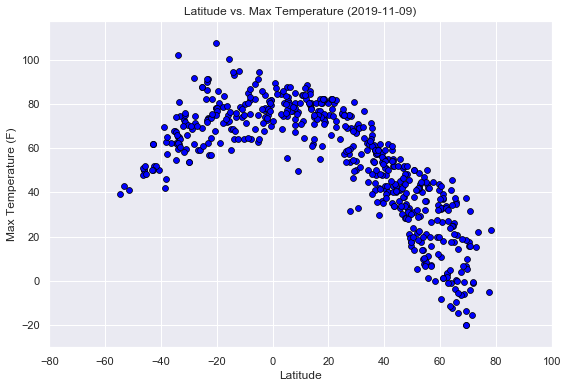

In [30]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)


plt.show()

#### Latitude vs. Humidity Plot

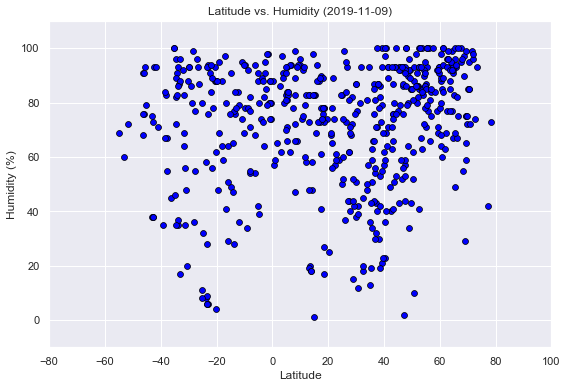

In [31]:
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

#### Latitude vs. Cloudiness Plot

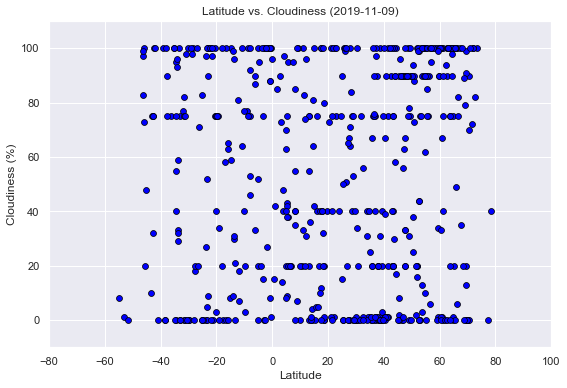

In [32]:
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10, 110)


plt.show()

#### Latitude vs. Wind Speed Plot

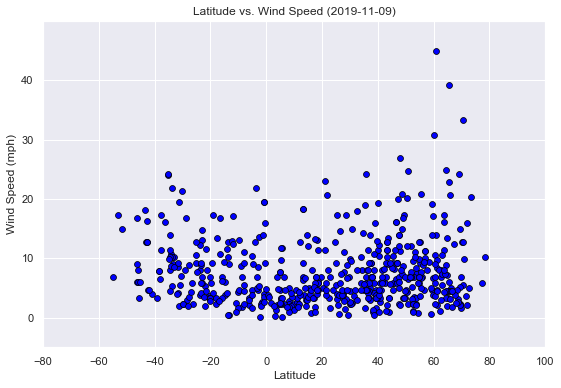

In [33]:
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)


plt.show()